<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_1X/blob/main/Generate_groupwise_1X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generating random numbers from a uniform distribution
https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781787125698/12/ch25lvl1sec126/generating-random-numbers-from-a-uniform-distribution

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import random
import statsmodels.api as sm
%matplotlib inline
from google.colab import files
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sp.random.seed(314157)

In [64]:
n=20
rep=0
#sp.random.seed(314157)
table_data_all=pd.DataFrame({"rep":[]})
for i in range(1000):
    data = pd.DataFrame({"X1" : sp.random.uniform(20, 100, n)})
    table_data = data.copy()

    table_data.loc[:math.floor(n/2),"e"] = table_data.loc[:math.floor(n/2),"X1"].apply(lambda X1: np.random.normal(0, math.sqrt(0.5)))
    table_data.loc[math.floor(n/2):,"e"] = table_data.loc[math.floor(n/2):,"X1"].apply(lambda X1: np.random.normal(0, math.sqrt(0.5)))
    # display(table_data.loc[:math.floor(n/2),"e"])
    # display(table_data.loc[math.floor(n/2):,"e"])
    # ==========================================

    # table_data = data_new.copy()


    table_data["Y"] = 10 + table_data["X1"] + table_data["e"]
    
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    new_data = table_data.copy()

    # ==========================================
    x = new_data[["X1"]]
    y = new_data["Y"]
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    y_pred = model.predict(x)

    df = pd.DataFrame({"Actual": y, "Predicted": y_pred})

    table_data_new = pd.DataFrame({"x1"    : new_data["X1"],
                                   "e"     : new_data["e"],
                                   "Y"     : df["Actual"],
                                   "y_hat" : df["Predicted"]})
    table_data_new["e_hat"] = table_data_new["Y"] - table_data_new["y_hat"]
    table_data_new["rep"] = rep
    table_data_new = table_data_new.reset_index()
    table_data_new
    # ==========================================
    table_data_all=pd.concat([table_data_all,table_data_new],axis=0,ignore_index=True,sort=False)
    rep+=1
    if rep==1000:
      break
table_data_all=table_data_all.set_index(["rep", "index"])
table_data_all

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    86.067866  0.125999   96.193866   95.991182  0.202684
      1.0    69.844040  0.363369   80.207410   79.891952  0.315458
      2.0    48.988212  0.334427   59.322639   59.196293  0.126345
      3.0    92.657922 -0.209182  102.448740  102.530626 -0.081886
      4.0    24.035203  0.175527   34.210730   34.434920 -0.224190
...                ...       ...         ...         ...       ...
999.0 15.0   70.058661  0.703738   80.762399   80.082160  0.680239
      16.0   89.409631 -0.527057   98.882574   99.631195 -0.748622
      17.0   25.897359 -0.491070   35.406289   35.468850 -0.062561
      18.0   92.613436  0.876963  103.490399  102.867793  0.622607
      19.0   58.256353 -0.265849   67.990505   68.159051 -0.168547

[20000 rows x 5 columns]

In [65]:
tablenew0 = table_data_all.loc[0.0]
tablenew1 = table_data_all.loc[1.0]
tablenew2 = table_data_all.loc[2.0]
tablenew3 = table_data_all.loc[3.0]
tablenew4 = table_data_all.loc[4.0]
tablenew5 = table_data_all.loc[5.0]
tablenew6 = table_data_all.loc[6.0]
tablenew7 = table_data_all.loc[7.0]
tablenew8 = table_data_all.loc[8.0]
tablenew9 = table_data_all.loc[9.0]

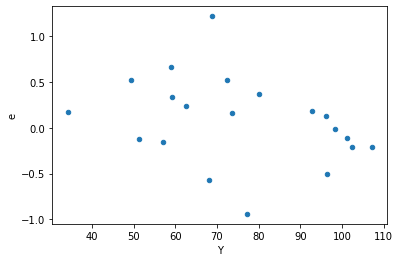

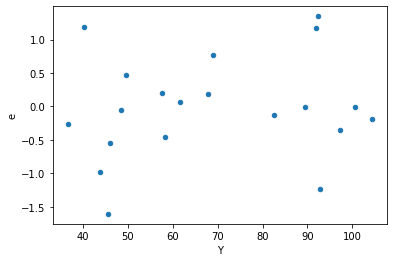

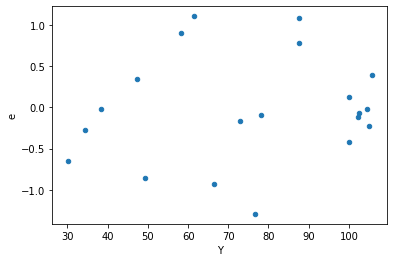

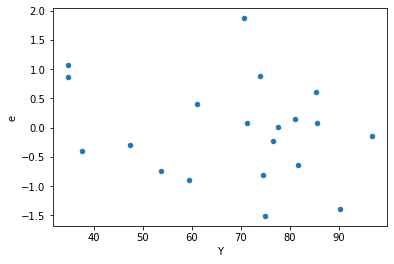

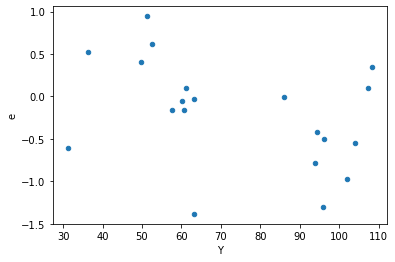

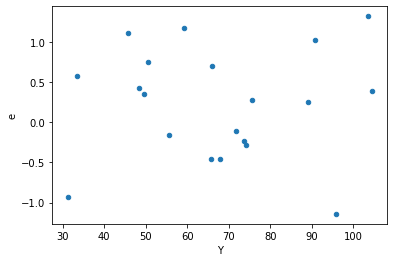

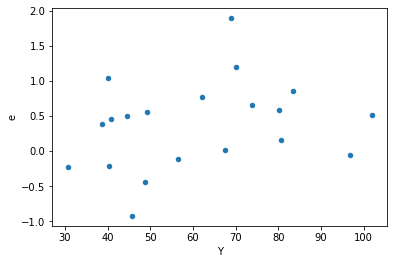

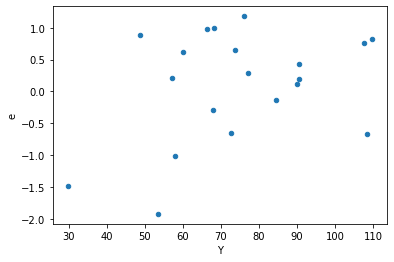

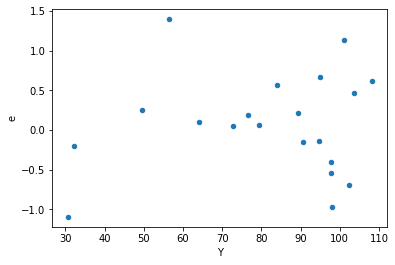

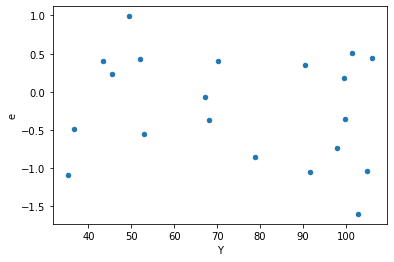

In [66]:
tablenew0.plot(x ='Y', y='e', kind = 'scatter')
tablenew1.plot(x ='Y', y='e', kind = 'scatter')
tablenew2.plot(x ='Y', y='e', kind = 'scatter')
tablenew3.plot(x ='Y', y='e', kind = 'scatter')
tablenew4.plot(x ='Y', y='e', kind = 'scatter')
tablenew5.plot(x ='Y', y='e', kind = 'scatter')
tablenew6.plot(x ='Y', y='e', kind = 'scatter')
tablenew7.plot(x ='Y', y='e', kind = 'scatter')
tablenew8.plot(x ='Y', y='e', kind = 'scatter')
tablenew9.plot(x ='Y', y='e', kind = 'scatter')

In [67]:
table_data_all.to_csv('data_groupwise_0.5_n20.csv')
files.download('data_groupwise_0.5_n20.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>